## Exploratory data analysis

In [106]:
import os
from os import path
import codecs
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from utils.read_data import get_data_full
from models.doc_embedding.utils import get_shortest_paths

In [12]:
def get_all_texts():
    text_path = './data/text/'
    filenames = os.listdir(text_path)
    all_texts = []
    for filename in filenames:
        try:
            with codecs.open(path.join(text_path, filename), encoding='utf-8') as f:
                all_texts.append(f.read().replace("\n", "").lower())
        except:
            with codecs.open(path.join(text_path, filename), encoding='latin-1') as f:
                all_texts.append(f.read().replace("\n", "").lower())
    return all_texts

In [96]:
G = nx.read_weighted_edgelist('./data/edgelist.txt', create_using=nx.DiGraph())
sp = get_shortest_paths()
all_texts = get_all_texts()
X_train, y_train, X_test, test_hosts = get_data_full()

## Watch out for imbalance

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

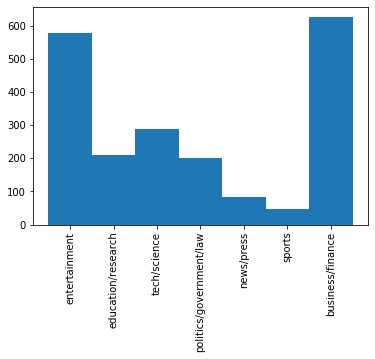

In [109]:
plt.hist(y_train, bins=np.arange(8) + 0.5)
plt.xticks(rotation=90)

## Distribution of doc lengths

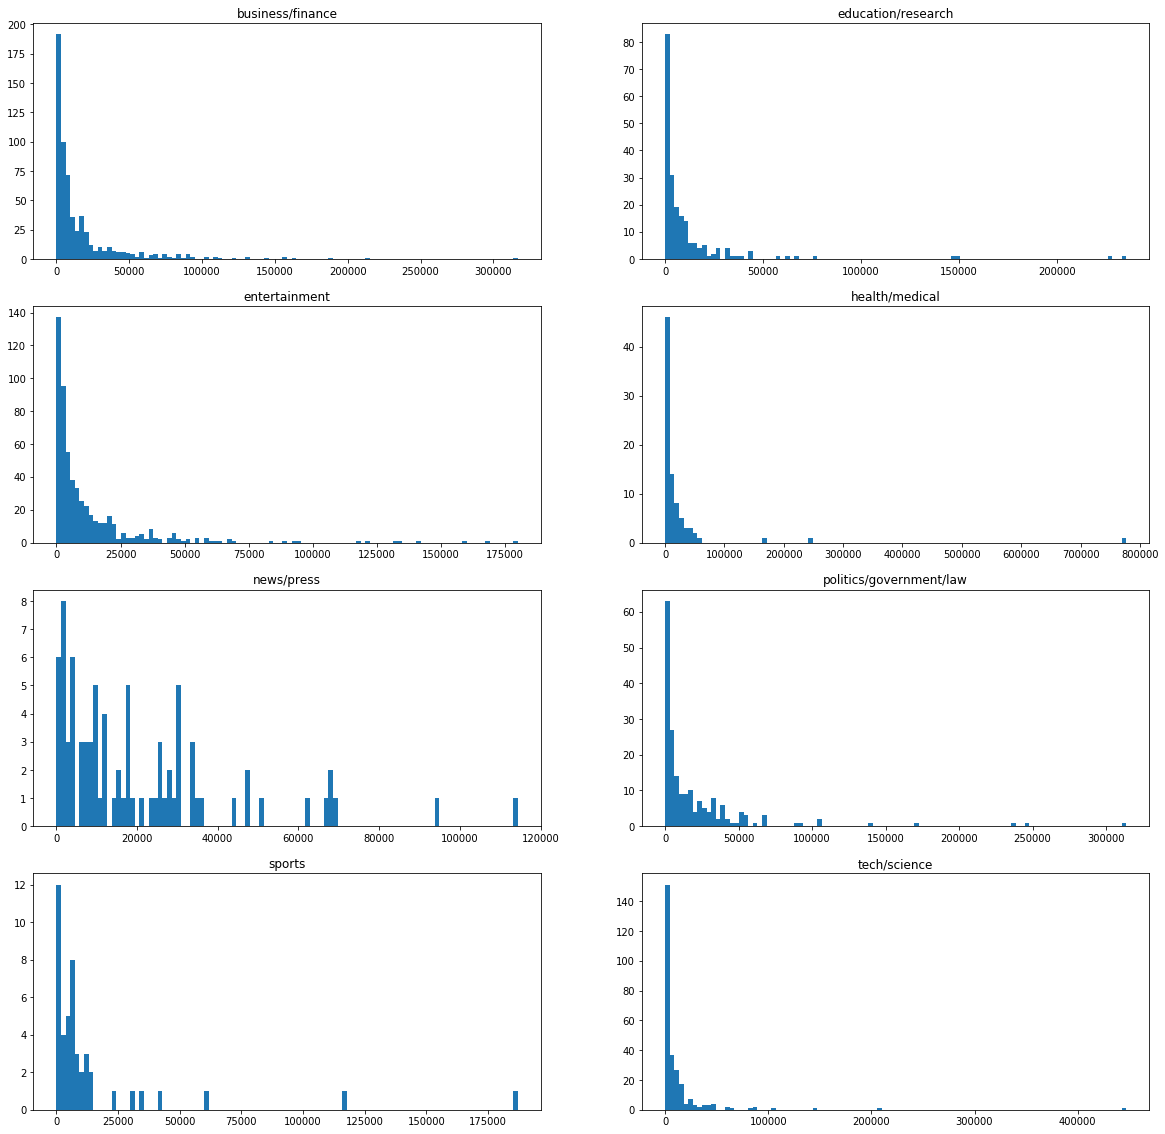

In [118]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for i in range(8):
    lb = labels[i]
    features, seen_hosts =[], []
    for u in range(len(y_train)):
        x = X_train[u]
        if lb == y_train[u] and x[0] not in seen_hosts:
            features.append(len(x[1].split(' ')))
            seen_hosts.append(x[0])
    ax[i // 2, i % 2].hist(features, bins=100)
    ax[i // 2, i % 2].set_title(lb)


In [74]:
train_hosts = [X_train[i][0] for i in range(len(X_train))]
G_labeled = G.subgraph(train_hosts)

In [75]:
print(len(G_labeled.nodes()))
print(len(set(train_hosts)))
print(len(train_hosts))

1994
1994
2125


## Attention, duplicates in X_train, y_train?

In [76]:
hosts_and_i = dict()
for i in range(len(y_train)):
    if train_hosts[i] in hosts_and_i:
        hosts_and_i[train_hosts[i]].append(i)
    else:
        hosts_and_i[train_hosts[i]] = [i]

In [77]:
for key, val in hosts_and_i.items():
    if len(val) > 1:
        print(key, val)

17502 [4, 860]
7904 [5, 1232]
27118 [22, 1533]
4257 [55, 392]
12305 [61, 867]
22879 [75, 79]
1519 [78, 487]
2276 [81, 1185]
9094 [97, 827]
3604 [101, 657]
18419 [104, 1654]
8388 [109, 753]
23815 [111, 888]
7328 [117, 1176]
11223 [119, 465]
26769 [123, 1222]
4429 [129, 1057]
7973 [139, 552]
22808 [141, 361]
27695 [142, 1390]
12099 [148, 613]
14657 [152, 299]
17061 [166, 1137]
20801 [167, 439]
16788 [180, 1058]
13387 [197, 604]
16391 [209, 380]
18954 [214, 230]
11415 [215, 1466]
6804 [217, 1416]
13989 [223, 1386]
2642 [229, 341]
7770 [236, 1316]
23760 [244, 1633]
10667 [255, 1895]
16778 [266, 871]
20828 [269, 856]
24227 [282, 368]
19892 [290, 847]
27475 [294, 542]
23320 [295, 1497]
6668 [301, 1691]
7198 [302, 1299]
18921 [315, 689]
22059 [322, 1708]
13202 [335, 1190]
17199 [344, 914]
15852 [365, 1198]
7845 [367, 1635]
27434 [377, 1030]
2602 [378, 462]
20375 [386, 1752]
6330 [387, 1385]
2583 [407, 1759]
14450 [414, 458]
23359 [421, 1369]
24769 [450, 2110]
6397 [453, 1487]
16550 [466, 1450

In [82]:
X_train[61] == X_train[867]

True

In [83]:
labels = ['business/finance', 'education/research', 'entertainment', 'health/medical',
          'news/press', 'politics/government/law', 'sports', 'tech/science']
labels_subset = ['news/press', 'politics/government/law']#, 'sports', 'tech/science']

In [92]:
train_hosts_subset = [X_train[i][0] for i in range(len(X_train)) if y_train[i] in labels_subset]
G_labeled_subset = G.subgraph(train_hosts_subset)
print(len(G_labeled_subset.nodes()))
print(len(set(train_hosts_subset)))
print(len(train_hosts_subset))


274
274
283


In [93]:
y_graph = []
nodes = G_labeled_subset.nodes()
for n in nodes:
    for i in range(len(train_hosts)):
        if train_hosts[i] == n:
            y_graph.append(y_train[i])
            break
node_color = LabelEncoder().fit_transform(y_graph)
y_graph

['health/medical',
 'tech/science',
 'politics/government/law',
 'tech/science',
 'entertainment',
 'education/research',
 'news/press',
 'politics/government/law',
 'news/press',
 'tech/science',
 'tech/science',
 'politics/government/law',
 'politics/government/law',
 'politics/government/law',
 'entertainment',
 'tech/science',
 'politics/government/law',
 'entertainment',
 'health/medical',
 'education/research',
 'entertainment',
 'tech/science',
 'sports',
 'entertainment',
 'entertainment',
 'education/research',
 'news/press',
 'entertainment',
 'tech/science',
 'tech/science',
 'tech/science',
 'entertainment',
 'education/research',
 'entertainment',
 'entertainment',
 'entertainment',
 'politics/government/law',
 'tech/science',
 'politics/government/law',
 'politics/government/law',
 'education/research',
 'entertainment',
 'tech/science',
 'entertainment',
 'entertainment',
 'entertainment',
 'entertainment',
 'entertainment',
 'education/research',
 'entertainment',
 'tec

# ???

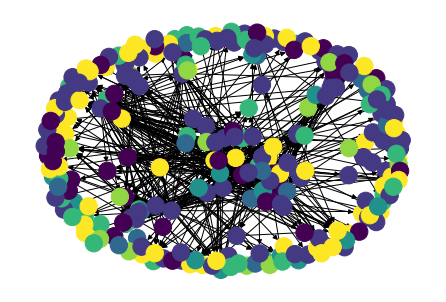

In [94]:
nx.draw(G_labeled, node_color=node_color)
plt.show()